<a href="https://colab.research.google.com/github/LuisRobles18/NLP/blob/main/Exam_1_Luis_Alberto_Robles_Hernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exam 1**
**Student ID:** 002581393 **Name:** Luis Alberto Robles Hernandez

##**INSTRUCTIONS:** 
Using the provided movie reviews dataset, please write code to answer the following questions.
The dataset has two classes: positive and negative (TRAINING folder), and the files for each
are properly labeled in the respective folders (positive, negative). Each txt document includes
one single review. The UNLABELED folder is for evaluation and should only be used then, not
for training. I will rerun all your notebook code to make sure you did not use it for training.


**Styling notes:**

1) Do not load any python packages/libraries inside any of the functions. You can have these in separate code cells, but not inside any given function.

2) Do not print anything from within your functions, this is bad form.

3) Make sure you pay attention to what the function is required to return.

4) If not explicitly requested, please print out whatever the function is supposed to return.

5) When printing to screen to show your results, make sure you format your output nicely and make sure it makes sense.


In [1]:
from IPython.display import clear_output
#Downloading the Shakespeare's work to the root folder
!wget https://github.com/LuisRobles18/NLP/blob/main/exam1_dataset.zip?raw=true -O exam1_dataset.zip
clear_output()

##**EXERCISE 1**
**1. (20 points)** Write a generic function that takes: Classification algorithm name, vectorization method name, training set with labels as parameters (total of 3 parameters should be passed). The function should take the classification algorithm name, the vectorization method’s name, and the training set and train the desired model. Use the default training parameters for the models we have seen in class. This function should return the trained model.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

def train_model(alg_name, vec_name, training_set):

    if alg_name.lower() == "multinomial nb":
    
        if vec_name.lower() == "tfidf":
        
            model = make_pipeline(TfidfVectorizer(), MultinomialNB())
            model.fit(training_set['data'], training_set['target'])
            return model
        
        if vec_name.lower() == "count vectorizer":
        
            model = make_pipeline(CountVectorizer(), MultinomialNB())
            model.fit(training_set['data'], training_set['target'])
            return model
        
        return -1

    elif alg_name.lower() == "random forest":
    
        if vec_name.lower() == "tfidf":
        
            model = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
            model.fit(training_set['data'], training_set['target'])
            return model
        
        if vec_name.lower() == "count vectorizer":
        
            model = make_pipeline(CountVectorizer(), RandomForestClassifier())
            model.fit(training_set['data'], training_set['target'])
            return model
        
        return -1
      
    elif alg_name.lower() == "support vector machines":
    
        if vec_name.lower() == "tfidf":
        
            model = make_pipeline(TfidfVectorizer(), SVC())
            model.fit(training_set['data'], training_set['target'])
            return model
        
        if vec_name.lower() == "count vectorizer":
        
            model = make_pipeline(CountVectorizer(), SVC())
            model.fit(training_set['data'], training_set['target'])
            return model
        
        return -1
        
    
    else:

        return -1
        


##**EXERCISE 2**

**2. (30 points)** Using the function from question 1 to build the following models:

a) Model a: Naive Bayes, Vectorizer: TFIDF and Bag of Words, Training set should be 75% of the provided dataset. Leaving the remaining 25% for testing.

b) Model b: RandomForest, Vectorizer: TFIDF and Bag of Words, Training set should be 70% of the provided dataset. Leaving the remaining 30% for testing.

c) Model c: Support Vector Machines (SVC in sklearn), Vectorizer: TFIDF and Bag of Words, Training set should be 60% of the provided dataset. Leaving the remaining 40% for testing.

**NOTE: Set the random seed to: 12345. This needs to be consistently set to train the model AND split the data in test and train. If this is not done correctly, you will lose points as your answers will not be comparable with the grading key.**

In [6]:
import zipfile
import random
import numpy as np
import os
from sklearn.model_selection import train_test_split

#This random seed is to have the same results with the grading key
random.seed(12345)
np.random.seed(12345)

#Openning the dataset ZIP file
my_zip = zipfile.ZipFile('exam1_dataset.zip')
storage_path = '.'

#------------------OBTAINING THE DATASETS--------------------------
data = []
target = []
target_names = ["negative_reviews","positive_reviews"]
documents_filename = []

for file in my_zip.namelist():
    #We will extract the negative reviews first to the data
    if file.startswith('exam1_dataset/TRAINING/negative/') and file.endswith('.txt'):
        documents_filename.append(os.path.basename(my_zip.getinfo(file).filename))
        with my_zip.open(file,"r") as doc:
            #Since the files read are from a zip file, we must convert them from binary to string using the decode function
            data.append(doc.read().decode())
            #For negative reviews, the value for the target will be 0
            target.append(0)

for file in my_zip.namelist():
    #Then we will extract the positive reviews to the data
    if file.startswith('exam1_dataset/TRAINING/positive/') and file.endswith('.txt'):
        documents_filename.append(os.path.basename(my_zip.getinfo(file).filename))
        with my_zip.open(file,"r") as doc:
            #Since the files read are from a zip file, we must convert them from binary to string using the decode function
            data.append(doc.read().decode())
            #For positive reviews, the value for the target will be 1
            target.append(1)

#================ MODEL A ===================
print("Building Model A...")
#Model = Multinomial NB
#% of Training = 75%
#% of Testing = 25%

model_a_training_data, model_a_test_data, model_a_training_target, model_a_test_target = train_test_split(data, target, test_size=0.25, random_state = 12345)
model_a_training_set = {}
model_a_training_set['data'] =  model_a_training_data
model_a_training_set['target'] = model_a_training_target

print("Building Model A using TF-IDF...")
#Vectorizer = TF-IDF
model_a_nb_tfidf = train_model("Multinomial NB", "TFIDF", model_a_training_set)

print("Building Model A using CountVectorizer...")
#Vectorizer = CountVectorizer
model_a_nb_cv = train_model("Multinomial NB", "Count Vectorizer", model_a_training_set)

#================ MODEL B ===================
print("Building Model B...")
#Model = Random Forest
#% of Training = 70%
#% of Testing = 30%

model_b_training_data, model_b_test_data, model_b_training_target, model_b_test_target = train_test_split(data, target, test_size=0.30, random_state = 12345)
model_b_training_set = {}
model_b_training_set['data'] =  model_b_training_data
model_b_training_set['target'] = model_b_training_target

print("Building Model B using TF-IDF...")
#Vectorizer = TF-IDF
model_b_rf_tfidf = train_model("Random Forest", "TFIDF", model_b_training_set)

print("Building Model B using CountVectorizer...")
#Vectorizer = CountVectorizer
model_b_rf_cv = train_model("Random Forest", "Count Vectorizer", model_b_training_set)

#================ MODEL C ===================
print("Building Model C...")
#Model = Support Vector Machines
#% of Training = 60%
#% of Testing = 40%

model_c_training_data, model_c_test_data, model_c_training_target, model_c_test_target = train_test_split(data, target, test_size=0.40, random_state = 12345)
model_c_training_set = {}
model_c_training_set['data'] =  model_c_training_data
model_c_training_set['target'] = model_c_training_target

print("Building Model C using TF-IDF...")
#Vectorizer = TF-IDF
model_c_svm_tfidf = train_model("Support Vector Machines", "TFIDF", model_c_training_set)

print("Building Model C using CountVectorizer...")
#Vectorizer = CountVectorizer
model_c_svm_cv = train_model("Support Vector Machines", "Count Vectorizer", model_c_training_set)

print("Success")

Building Model A...
Building Model A using TF-IDF...
Building Model A using CountVectorizer...
Building Model B...
Building Model B using TF-IDF...
Building Model B using CountVectorizer...
Building Model C...
Building Model C using TF-IDF...
Building Model C using CountVectorizer...
Success


##**EXERCISE 3**

**3. (30 points)** Using the models from Question 2, evaluate each model with its respective testing set (for model a, that set is 25% of the data, for model b, that set is 30% of the data, and for model c that set is 40% of the data. Be careful to not mix up the evaluation sets. With the predictions on the test set and show the following metrics: Accuracy, Precision, Recall, and Macro F1-score

In [7]:
import sklearn
import pandas as pd

df = pd.DataFrame(columns=['Model Name','Training %','Test %','Accuracy','Precision','Recall','Macro F1-Score'])

#With these two variables we will determine which of the following models performs the best
best_accuracy = -1.0
best_model = None

print("Evaluating and getting metrics from Multinomial NB TF-IDF...")
#====== Multinomial NB TF-IDF (METRICS) ============
model_a_nb_tfidf_labels = model_a_nb_tfidf.predict(model_a_test_data)
model_a_nb_tfidf_accuracy = sklearn.metrics.accuracy_score(model_a_test_target,model_a_nb_tfidf_labels)
model_a_nb_tfidf_precision = sklearn.metrics.precision_score(model_a_test_target,model_a_nb_tfidf_labels)
model_a_nb_tfidf_recall = sklearn.metrics.recall_score(model_a_test_target,model_a_nb_tfidf_labels)
model_a_nb_tfidf_f1 = sklearn.metrics.f1_score(model_a_nb_tfidf_labels, model_a_test_target, average='macro')

model_a_nb_tfidf_metrics = ['Multinomial NB (TF-IDF)','75%','25%',model_a_nb_tfidf_accuracy,model_a_nb_tfidf_precision,model_a_nb_tfidf_recall,model_a_nb_tfidf_f1]

if model_a_nb_tfidf_accuracy > best_accuracy:
    best_model = model_a_nb_tfidf
    best_accuracy = model_a_nb_tfidf_accuracy

print("Evaluating and getting metrics from Multinomial Count Vectorizer...")
#====== Multinomial NB Count Vectorizer (METRICS) ============
model_a_nb_cv_labels = model_a_nb_cv.predict(model_a_test_data)
model_a_nb_cv_accuracy = sklearn.metrics.accuracy_score(model_a_test_target,model_a_nb_cv_labels)
model_a_nb_cv_precision = sklearn.metrics.precision_score(model_a_test_target,model_a_nb_cv_labels)
model_a_nb_cv_recall = sklearn.metrics.recall_score(model_a_test_target,model_a_nb_cv_labels)
model_a_nb_cv_f1 = sklearn.metrics.f1_score(model_a_nb_cv_labels, model_a_test_target, average='macro')

model_a_nb_cv_metrics = ['Multinomial NB (Count Vectorizer)','75%','25%',model_a_nb_cv_accuracy,model_a_nb_cv_precision,model_a_nb_cv_recall,model_a_nb_cv_f1]

if model_a_nb_cv_accuracy > best_accuracy:
    best_model = model_a_nb_cv
    best_accuracy = model_a_nb_cv_accuracy

print("Evaluating and getting metrics from Random Forest TF-IDF...")
#====== Random Forest TF-IDF (METRICS) ============
model_b_rf_tfidf_labels = model_b_rf_tfidf.predict(model_b_test_data)
model_b_rf_tfidf_accuracy = sklearn.metrics.accuracy_score(model_b_test_target,model_b_rf_tfidf_labels)
model_b_rf_tfidf_precision = sklearn.metrics.precision_score(model_b_test_target,model_b_rf_tfidf_labels)
model_b_rf_tfidf_recall = sklearn.metrics.recall_score(model_b_test_target,model_b_rf_tfidf_labels)
model_b_rf_tfidf_f1 = sklearn.metrics.f1_score(model_b_rf_tfidf_labels, model_b_test_target, average='macro')

model_b_rf_tfidf_metrics = ['Random Forest (TF-IDF)','70%','30%',model_b_rf_tfidf_accuracy,model_b_rf_tfidf_precision,model_b_rf_tfidf_recall,model_b_rf_tfidf_f1]

if model_b_rf_tfidf_accuracy > best_accuracy:
    best_model = model_b_rf_tfidf
    best_accuracy = model_b_rf_tfidf_accuracy

print("Evaluating and getting metrics from Random Forest Count Vectorizer...")
#====== Random Forest Count Vectorizer (METRICS) ============
model_b_rf_cv_labels = model_b_rf_cv.predict(model_b_test_data)
model_b_rf_cv_accuracy = sklearn.metrics.accuracy_score(model_b_test_target,model_b_rf_cv_labels)
model_b_rf_cv_precision = sklearn.metrics.precision_score(model_b_test_target,model_b_rf_cv_labels)
model_b_rf_cv_recall = sklearn.metrics.recall_score(model_b_test_target,model_b_rf_cv_labels)
model_b_rf_cv_f1 = sklearn.metrics.f1_score(model_b_rf_cv_labels, model_b_test_target, average='macro')

model_b_rf_cv_metrics = ['Random Forest (Count Vectorizer)','70%','30%',model_b_rf_cv_accuracy,model_b_rf_cv_precision,model_b_rf_cv_recall,model_b_rf_cv_f1]

if model_b_rf_cv_accuracy > best_accuracy:
    best_model = model_b_rf_cv
    best_accuracy = model_b_rf_cv_accuracy

print("Evaluating and getting metrics from Support Vector Machines TF-IDF...")
#====== Support Vector Machines TF-IDF (METRICS) ============
model_c_svm_tfidf_labels = model_c_svm_tfidf.predict(model_c_test_data)
model_c_svm_tfidf_accuracy = sklearn.metrics.accuracy_score(model_c_test_target,model_c_svm_tfidf_labels)
model_c_svm_tfidf_precision = sklearn.metrics.precision_score(model_c_test_target,model_c_svm_tfidf_labels)
model_c_svm_tfidf_recall = sklearn.metrics.recall_score(model_c_test_target,model_c_svm_tfidf_labels)
model_c_svm_tfidf_f1 = sklearn.metrics.f1_score(model_c_svm_tfidf_labels, model_c_test_target, average='macro')

model_c_svm_tfidf_metrics = ['Support Vector Machines (TF-IDF)','60%','40%',model_c_svm_tfidf_accuracy,model_c_svm_tfidf_precision,model_c_svm_tfidf_recall,model_c_svm_tfidf_f1]

if model_c_svm_tfidf_accuracy > best_accuracy:
    best_model = model_c_svm_tfidf
    best_accuracy = model_c_svm_tfidf_accuracy

print("Evaluating and getting metrics from Support Vector Machines Count Vectorizer...")
#====== Support Vector Machines Count Vectorizer (METRICS) ============
model_c_svm_cv_labels = model_c_svm_cv.predict(model_c_test_data)
model_c_svm_cv_accuracy = sklearn.metrics.accuracy_score(model_c_test_target,model_c_svm_cv_labels)
model_c_svm_cv_precision = sklearn.metrics.precision_score(model_c_test_target,model_c_svm_cv_labels)
model_c_svm_cv_recall = sklearn.metrics.recall_score(model_c_test_target,model_c_svm_cv_labels)
model_c_svm_cv_f1 = sklearn.metrics.f1_score(model_c_svm_cv_labels, model_c_test_target, average='macro')

model_c_svm_cv_metrics = ['Support Vector Machines (Count Vectorizer)','60%','40%',model_c_svm_cv_accuracy,model_c_svm_cv_precision,model_c_svm_cv_recall,model_c_svm_cv_f1]

if model_c_svm_cv_accuracy > best_accuracy:
    best_model = model_c_svm_cv
    best_accuracy = model_c_svm_cv_accuracy

print("Success!")

#Adding the previous metrics to a dataframe

df.loc[len(df), :] = model_a_nb_tfidf_metrics
df.loc[len(df), :] = model_a_nb_cv_metrics
df.loc[len(df), :] = model_b_rf_tfidf_metrics
df.loc[len(df), :] = model_b_rf_cv_metrics
df.loc[len(df), :] = model_c_svm_tfidf_metrics
df.loc[len(df), :] = model_c_svm_cv_metrics

df

Evaluating and getting metrics from Multinomial NB TF-IDF...
Evaluating and getting metrics from Multinomial Count Vectorizer...
Evaluating and getting metrics from Random Forest TF-IDF...
Evaluating and getting metrics from Random Forest Count Vectorizer...
Evaluating and getting metrics from Support Vector Machines TF-IDF...
Evaluating and getting metrics from Support Vector Machines Count Vectorizer...
Success!


,Model Name,Training %,Test %,Accuracy,Precision,Recall,Macro F1-Score
0,Multinomial NB (TF-IDF),75%,25%,0.86896,0.87711,0.850966,0.868774
1,Multinomial NB (Count Vectorizer),75%,25%,0.84992,0.871444,0.812643,0.849448
2,Random Forest (TF-IDF),70%,30%,0.839467,0.841349,0.828525,0.839343
3,Random Forest (Count Vectorizer),70%,30%,0.849867,0.839552,0.857376,0.849852
4,Support Vector Machines (TF-IDF),60%,40%,0.8959,0.888162,0.903753,0.8959
5,Support Vector Machines (Count Vectorizer),60%,40%,0.8541,0.839581,0.872276,0.854084


With this in mind, please write and answer these questions in your
notebook:

**a) What model performs the best and why? (which metrics do you base this on, and why do you think it performs better than others).**

Support Vector Machines, using the TF-IDF vectorizer, because it has the highest accuracy comparing to the other models (according to the previous results from above). I think I would perform better than others, because, once predicting labels using the testing set, the margin of error would be smaller compared to the other models.

**b) Why is it important not to mix up the testing sets between different models? Think about this one.**

Because there could be some cases, that some of the elements from the testing set, could insertect with the elements trained with a specific model, so the results wouldn't be reliable, that is, the metrics obtained would not represent the correct accuracy.

**c) Display in a single sorted dataframe (model name, training %, test %, accuracy, precision, recall, F1-score) all performance metrics, sorted by accuracy in descending manner.**


In [12]:
df.sort_values(by='Accuracy', ascending=False)

,Model Name,Training %,Test %,Accuracy,Precision,Recall,Macro F1-Score
4,Support Vector Machines (TF-IDF),60%,40%,0.8959,0.888162,0.903753,0.8959
0,Multinomial NB (TF-IDF),75%,25%,0.86896,0.87711,0.850966,0.868774
5,Support Vector Machines (Count Vectorizer),60%,40%,0.8541,0.839581,0.872276,0.854084
1,Multinomial NB (Count Vectorizer),75%,25%,0.84992,0.871444,0.812643,0.849448
3,Random Forest (Count Vectorizer),70%,30%,0.849867,0.839552,0.857376,0.849852
2,Random Forest (TF-IDF),70%,30%,0.839467,0.841349,0.828525,0.839343


##**EXERCISE 4**

**4. (15 points)** Using the documents in the folder named UNLABELED, please use
your best performing trained model from question 3 to predict their labels. Please do this individually for each document. Print to the screen the following items: Document Name, Predicted Label.


In [9]:
#Openning the dataset ZIP file
my_zip = zipfile.ZipFile('exam1_dataset.zip')
storage_path = '.'

#------------------OBTAINING THE UNLABELED DATASET--------------------------
data_unlabeled = []
documents_name = []

for file in my_zip.namelist():
    #We will extract the unlabeled txt files from the ZIP file
    if file.startswith('exam1_dataset/UNLABELED/') and file.endswith('.txt'):
        documents_name.append(my_zip.getinfo(file).filename)
        with my_zip.open(file,"r") as doc:
            #Since the files read are from a zip file, we must convert them from binary to string using the decode function
            data_unlabeled.append(doc.read().decode())

#We define a method in which returns the predicted label
def predict_category(s, target_n, model_temp):
    pred = model_temp.predict([s])
    return target_n[pred[0]]

#We create a Pandas Dataframe
df_prediction = pd.DataFrame(columns=['Document_Name','Predicted_Label'])

#We will iterate over each document from the UNLABELED folder, with their respective filename and predicted label
#The best performing model is located in the best_model variable obtained from the previous exercise
for i in range(len(data_unlabeled)):

    temp_list = [os.path.basename(documents_name[i]), predict_category(data_unlabeled[i],target_names,best_model)]
    df_prediction.loc[len(df_prediction), :] = temp_list

df_prediction



,Document_Name,Predicted_Label
0,0_0.txt,positive_reviews
1,24221_0.txt,negative_reviews
2,35968_0.txt,negative_reviews
3,35991_0.txt,negative_reviews
4,36022_0.txt,negative_reviews
5,36149_0.txt,negative_reviews
6,36517_0.txt,negative_reviews
7,37154_0.txt,negative_reviews
8,46278_0.txt,negative_reviews
9,46705_0.txt,negative_reviews


**Using a text cell, write your own opinion if the label is correct and why. You have to read the document to make your own opinion.**
After reading all the unlabeled reviews, it seems every single file is a negative review. As we can see, there is one prediction with a wrong label. The reason is because, if we remember from the metrics from the best model, its accuracy is almost 90%. So, that means that on average, out of 10 predictions, the model may be wrong in one of them, as seen in the previous results.

##**EXERCISE 5**

**5. (20 points)** Build a function that takes the set of documents as input and returns a cosine similarity matrix for those documents. Feed all documents in the TRAINING folder to this matrix. Instead of printing the returned cosine similarity matrix, create a heatmap plot from the returned matrix. Make sure your plot is nicely scaled, properly labeled, and uses a nice color range to show the similarity.

In [31]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np;

np.random.seed(12345)

def generate_cos_sim_matrix(documents):

    #We call the TF-IDF from the Sklearn module
    tfidf_vectorizer = TfidfVectorizer()

    #We generate the tf-idf vectors for the text files
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

    total = len(documents)
    final_cosine_sim_matrix = [None] * total

    #In order to avoid memory getting full quickly, we will do the analysis per row
    for i in range(total):
        final_cosine_sim_matrix[i] = cosine_similarity(tfidf_matrix[i], tfidf_matrix).tolist()
    return final_cosine_sim_matrix


cos_similarity_matrix = generate_cos_sim_matrix(data)

#We reshape to a 25000 by 25000 matrix in a numpy array
a = np.array(cos_similarity_matrix)
new_cos_similarity_matrix = a.reshape(25000,25000)
del cos_similarity_matrix #Delete from memory old list

**Showing the heat map from the previous matrix**

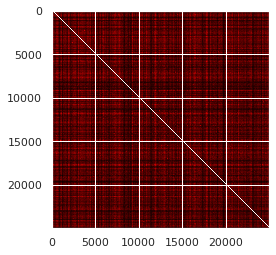

In [42]:
import matplotlib.pyplot as plt

plt.imshow(new_cos_similarity_matrix, cmap='hot', interpolation='nearest')

##**EXERCISE 6**

**6. (15 points)** Write a function that takes a cosine similarity matrix as input and returns a list with the top n document paris and their similarity. Note that you should only keep the document pairs that are unique and remove the comparisons of the document to itself. Print the top 50 similar document pairs.


In [38]:
def top_n_similar_works(sim_matrix,top_n):
    top_n_works = {}

    #We iterate over each cell in the matrix
    total = len(sim_matrix)
    for i in range(len(sim_matrix)):
        for j in range(len(sim_matrix[i])):

            #Excludes cosine similarity with itself
            if i != j:

                if len(top_n_works) < top_n:
                    top_n_works[str(i)+","+str(j)] = sim_matrix[i][j]
                else:
                    is_mirror_sim = False
                    for key in top_n_works:
                        coordinates = key.split(",")
                        #This condition is to exclude mirror similarities if found
                        if(int(coordinates[1]) == i and int(coordinates[0]) == j):
                            is_mirror_sim = True
                    
                    if is_mirror_sim == False:
                        #If the current cell is greater than the lowest value of the top N list
                        #It will be replaced with the current cell
                        if top_n_works[min(top_n_works, key=top_n_works.get)] < sim_matrix[i][j]:
                            del top_n_works[min(top_n_works, key=top_n_works.get)]
                            top_n_works[str(i)+","+str(j)] = sim_matrix[i][j]

    #The function will return a dataframe with the top N similar works, including their similarity
    df_top_similar = pd.DataFrame(columns=["[Position] Document", "[Position] Most similar document", "Similarity"])
    top_n_works = sorted(top_n_works.items(), key=lambda kv: kv[1], reverse=True)


    for i in range(len(top_n_works)):
        coordinates = top_n_works[i][0].split(",")
        df_top_similar.loc[len(df_top_similar)] = ["["+coordinates[0]+"]"+documents_filename[int(coordinates[0])],
                                                   "["+coordinates[1]+"]"+documents_filename[int(coordinates[1])],top_n_works[i][1]]

    return df_top_similar.style.set_properties(**{'text-align': 'left'})

**Getting the Top 50 similar document pairs**

In [41]:
#Get top 50 similar document pairs
top_n_similar_works(new_cos_similarity_matrix,50)

,[Position] Document,[Position] Most similar document,Similarity
0,[367]10330_1.txt,[4498]279_1.txt,1.000000
1,[369]10332_1.txt,[4521]281_1.txt,1.000000
2,[2148]11934_1.txt,[7532]552_1.txt,1.000000
3,[6927]4986_2.txt,[10134]7872_2.txt,1.000000
4,[6930]4989_3.txt,[10137]7875_3.txt,1.000000
5,[8973]6827_4.txt,[9882]7645_4.txt,1.000000
6,[15341]1307_10.txt,[15343]1309_10.txt,1.000000
7,[23080]8273_10.txt,[23085]8278_10.txt,1.000000
8,[370]10333_1.txt,[4532]282_1.txt,1.000000
9,[1343]11209_3.txt,[2016]11815_3.txt,1.000000


Compare the assigned class for each document and answer:

**Do all similar documents belong to the same class? Why or why not?**

First of all, to remember, the first half of documents are from the negative reviews, and the other half from the positive reviews. With that said, all of the top 50 documents belongs to the same class because, normally positive and negative reviews have something in common (Like the words they use, for example, on negative reviews we can find the words "sucks, worse, disappointed, etc")

##**EXERCISE 7**

**7. (20 points)** Using Spacy’s part of speech tagger, process all sentences (hint: don’t forget to split the reviews) and count how many NOUN and VERB tags are found in all the movies review (TRAINING folder) separating them by label. In other words, how many NOUN and VERB tags are found in positive reviews, and how many NOUN and VERB tags are found in negative reviews.

In [19]:
import spacy
nlp = spacy.load("en_core_web_sm")

#Splitting the reviews
#When we obtained the files from the zip file, the data variable was stored in the following order:
#    *The first half are negative reviews
#    *The last half are positive reviews
total_elements = len(data)
half = int(total_elements/2)
negative_data = data[:half]
positive_data = data[total_elements-half:]

#Counting VERBS and NOUNS in the negative reviews
print("Counting verbs and nouns in the negative reviews..")
total_verbs_negative_reviews = 0
total_nouns_negative_reviews = 0
total_negative_data = len(negative_data)
last_percentage = 0

nlp_negative_reviews = []
for i in range(total_negative_data):
    nlp_negative_reviews.append(nlp(negative_data[i]))
    for token in nlp_negative_reviews[i]:
        if token.pos_ == "VERB":
            total_verbs_negative_reviews += 1
        if token.pos_ == "NOUN":
            total_nouns_negative_reviews += 1

    percentage = (i/total_negative_data)*100

    if percentage - last_percentage >= 5:
        print("Progress: "+str(round(percentage))+"%")
        last_percentage = percentage


#Counting VERBS and NOUNS in the positive reviews
print("Counting verbs and nouns in the positive reviews..")
total_verbs_positive_reviews = 0
total_nouns_positive_reviews = 0
total_positive_data = len(positive_data)
last_percentage = 0

nlp_positive_reviews = []
for i in range(total_positive_data):
    nlp_positive_reviews.append(nlp(positive_data[i]))
    for token in nlp_positive_reviews[i]:
        if token.pos_ == "VERB":
            total_verbs_positive_reviews += 1
        if token.pos_ == "NOUN":
            total_nouns_positive_reviews += 1
    
    percentage = (i/total_positive_data)*100

    if percentage - last_percentage >= 5:
        print("Progress: "+str(round(percentage))+"%")
        last_percentage = percentage

print("Success!")
clear_output()

#Passing the results to a pandas dataframe
df_st = pd.DataFrame(columns=['Type of Reviews','Total of Verbs','Total of Nouns'])
df_st.loc[len(df_st), :] = ['Negative',total_verbs_negative_reviews,total_nouns_negative_reviews]
df_st.loc[len(df_st), :] = ['Positive',total_verbs_positive_reviews,total_nouns_positive_reviews]
df_st

,Type of Reviews,Total of Verbs,Total of Nouns
0,Negative,355559,528475
1,Positive,342125,542978


Answer the following questions: 

**When comparing both, do you see any differences?**

There is relatively no abysmal difference between the positive and negative reviews, regarding the number of verbs and nouns in each one. We can see that the negative reviews have slightly more verbs, and on the other hand, the positive reviews have slighty more nouns.

**Why do you think about the differences? Or lack of them.**

The little difference between these results may be because, if we look at the size (in bytes) of both data sets, they are similar (around 37MB), so we can expect that there could be very little difference in the amount of tokens for each dataset (negative and positive). In other words, if any of the datasets (either positive or negative) are a lot larger, probably we would see a great difference comparing the results (number of nouns and verbs) to the other dataset.

##**EXERCISE 8**

**8. (20 points)** Using the results from the PoS process in question 7, count how many different PUNCT tags are found and their respective counts from the full dataset provided (both negative and positives together). Using regex, write a set of regular expressions that generate the same counts from the dataset without using NLTK or Spacy, just regex.


**Counting the PUNCT tags using the results from the previous question**

In [29]:
nlp_reviews = nlp_negative_reviews + nlp_positive_reviews


total_punct = 0
print("Counting the punctuations in the reviews using last's exercise results..")
#Counting for PUNCT tags on each review (positive and negative)
for i in range(len(nlp_reviews)):
    for token in nlp_reviews[i]:
        if token.pos_ == "PUNCT":
            total_punct += 1

print("Total PUNCT tags found in the full dataset (negative and positive reviews): \033[1m"+str(total_punct)+"\033[0m")


Counting the punctuations in the reviews using last's exercise results..
Total PUNCT tags found in the full dataset (negative and positive reviews): 834967


**Counting the PUCT tags using regular expressions**

In [35]:
import re

print("Counting the punctuations in the reviews using regexp..")
total_punct = 0
for i in range(len(data)):

    #In theory, a sentence should begin with a capital letter, although, the reviews may contain some typos
    #Basically, at least, the first letter of the sentence should be uppercase (At least one ocurrence '{1}')
    #We are asumming the sentence with punctuation mark can end either with ?,! or .
    #Also there could be colon, semicolon, quotation, single quotation, comma
    #hyphen, dash, parenthesis, brackets, and braces inside a sentence
    total_punct += len(re.findall('^[A-Z]{1}[^!?.]*[!?.]$', data[i]))
    total_punct += len(re.findall(',', data[i]))
    total_punct += len(re.findall(':', data[i]))
    total_punct += len(re.findall(';', data[i]))
    total_punct += len(re.findall('"', data[i]))
    total_punct += len(re.findall('\'', data[i]))
    total_punct += len(re.findall('/', data[i]))
    total_punct += len(re.findall('{', data[i]))
    total_punct += len(re.findall('}', data[i]))
    total_punct += len(re.findall('\[', data[i]))
    total_punct += len(re.findall('\]', data[i]))
    total_punct += len(re.findall('\(', data[i]))
    total_punct += len(re.findall('\)', data[i]))
    total_punct += len(re.findall('-', data[i]))
    total_punct += len(re.findall('—', data[i]))

print("Total PUNCT tags matched using regex in the full dataset (negative and positive reviews): \033[1m"+str(total_punct)+"\033[0m")

Counting the punctuations in the reviews using regexp..
Total PUNCT tags matched using regex in the full dataset (negative and positive reviews): 740746


**Can you get the same counts? If not, why do you think this is?**

No, as we can see from the results in the last two questions, the previous exercise did a better job than the current exercise with regular expressions. The reason is because that there could be some inconsistencies in the full dataset.

As we know, these reviews could be written by any kind of people, so, we can expect some gramatical errors, thus the results using regexp could be even worse than from the previous exercise.

For example, let's say a sentence from a review starts with a lowercase letter (which is not suppose to be in that way), in this case, using the exercise from the previous question would be able to detect that tag correctly. However, the regexp won't be able to detect that match, because, according to the pattern, the sentence should start with an uppercase letter.

Another example, let's say in a review, there's the following word "apple's". Using the previous exercise, the apostrophe would be tagged as PART. However, using the regex from the current exercise will be able to match that pattern as a punctuation tag (in which is not correct at all).

Also another example, let's say in a review, have the following part in the text "Mr. Doe", using the previous exercise, the word "Mr." will be tagged as PROPN. However, using the regex from the current exercise, it will be count as a punctuation tag (in which is not correct at all).